<a href="https://colab.research.google.com/github/alex1976/DataWarehouse/blob/main/Supplier_offer_analysis_AI_PBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Strumento per la COMPARAZIONE di offerte fornitori in ambito edile-impiantistico**

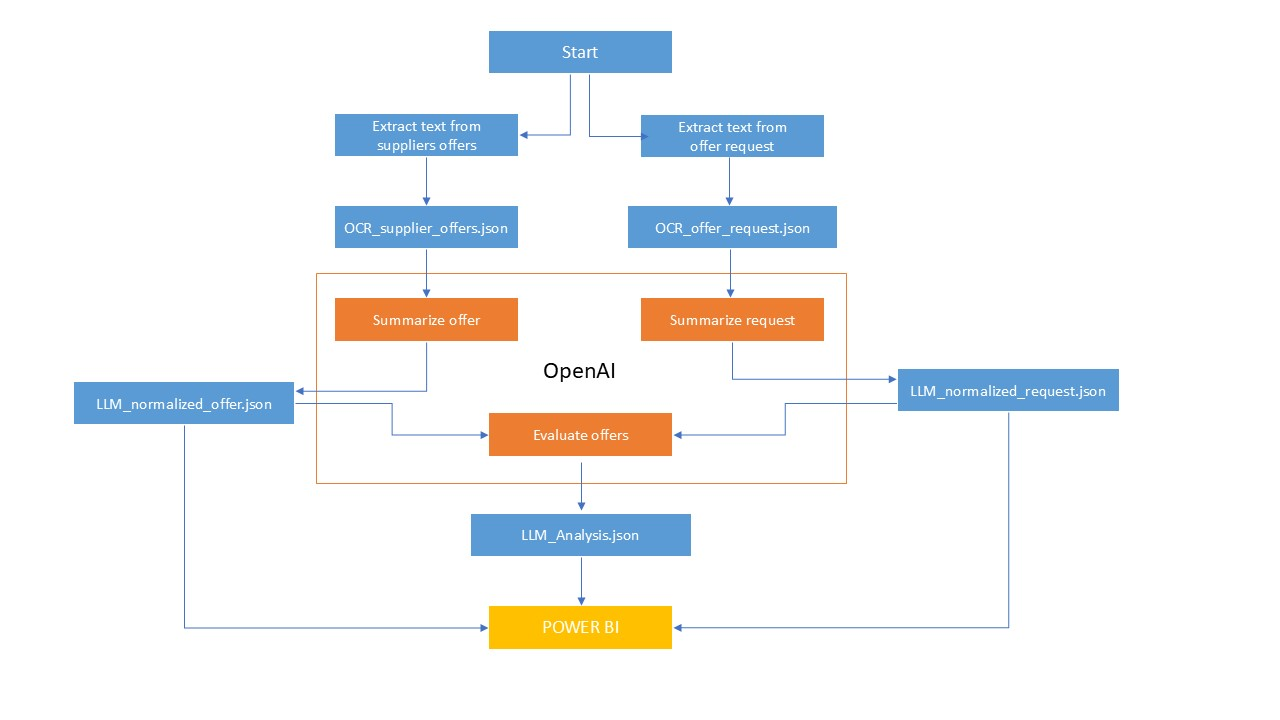

STEP1: Definizione dei percorsi contenenti input e output

In [13]:
# Define the folder of the desired analysis
analysis_folder = "/content/sample_data/SupplierOfferAnalysis/03_Analysis"
results_folder_path = "/content/sample_data/SupplierOfferAnalysis/02_OCR_Result"
input_folder_path = "/content/sample_data/SupplierOfferAnalysis/01_Offers"
gptModel = "gpt-4o"

STEP2: PDF Text Extraction Script

This script extracts text from all PDF files within a designated folder and saves the extracted content in a JSON file. It processes every PDF in the folder, stores the filename and corresponding text in a JSON structure, and ensures that the JSON file is overwritten with fresh data each time the script is executed. The output JSON file is saved in the same directory as the PDF files, making it convenient to access the extracted information.

In [10]:
!pip install PyMuPDF

In [14]:
import fitz  # PyMuPDF
import os
import json

# Create the directory if it does not exist
# os.makedirs(folder_path, exist_ok=True)

# Initialize an empty list to store the extracted text
extracted_data = []

# Iterate through all the files in the folder
for filename in os.listdir(input_folder_path):
    if filename.endswith(".pdf"):  # Process only PDF files
        file_path = os.path.join(input_folder_path, filename)
        print(f"process file {file_path}")

        # Open the PDF file
        doc = fitz.open(file_path)

        # Extract text from each page
        text = ""
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)
            text += page.get_text()

        # Store the extracted text in a dictionary with the filename as key
        extracted_data.append({
            "filename": filename,
            "content": text
        })

# Convert the list to JSON format
extracted_json = json.dumps(extracted_data, indent=4)

# Define the output path to save the JSON file in the same location as the CV folder
output_json_path = os.path.join(results_folder_path, "OCR_Results.json")

# Save the JSON data to a file (this will overwrite the file if it already exists)
with open(output_json_path, 'w') as json_file:
    json_file.write(extracted_json)

print(f"JSON data has been successfully saved to {output_json_path}")

process file /content/sample_data/SupplierOfferAnalysis/01_Offers/Esempio-Offerta-2.pdf
process file /content/sample_data/SupplierOfferAnalysis/01_Offers/Esempio-Offerta-1.pdf
JSON data has been successfully saved to /content/sample_data/SupplierOfferAnalysis/02_OCR_Result/OCR_Results.json
